In [2]:
##Taxi

In [9]:
import numpy as np
from collections import defaultdict, deque
import sys
import math
import gym
import matplotlib.pyplot as plt

In [4]:
# Define Agent
class Agent:

    def __init__(self, nA=6, epsilon = 1, epsilon_decay = .9999, alpha = 0.25, min_epsilon = 0.005, gamma = 0.77):
        """ Initialize agent.

        Params
        ======
        - nA: number of actions available to the agent
        """
        self.nA = nA
        self.Q = defaultdict(lambda: np.zeros(self.nA))
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.alpha = alpha
        self.min_epsilon = min_epsilon
        self.gamma = gamma

    def select_action(self, state, i_episode):
        """ Given the state, select an action.

        Params
        ======
        - state: the current state of the environment

        Returns
        =======
        - action: an integer, compatible with the task's action space
        """
        if self.Q[state] is not None and self.epsilon < np.random.random():
            action = np.argmax(self.Q[state])
            
        else:
            action = np.random.choice(self.nA)

        # decay epsilon
        self.epsilon = max(self.epsilon * self.epsilon_decay, self.min_epsilon)
        return action
            
    def step(self, state, action, reward, next_state, done):
        """ Update the agent's knowledge, using the most recently sampled tuple.

        Params
        ======
        - state: the previous state of the environment
        - action: the agent's previous choice of action
        - reward: last reward received
        - next_state: the current state of the environment
        - done: whether the episode is complete (True or False)
        """
        alpha = self.alpha
        gamma = self.gamma
        Q_t = self.Q[state][action]
        
        if not done:
            next_action = np.argmax(self.Q[next_state])
            next_Q = self.Q[next_state][next_action]
            self.Q[state][action] = (1 - alpha) * Q_t + alpha * (reward + gamma * next_Q)
        if done:
            self.Q[state][action] = (1 - alpha) * Q_t + alpha * (reward)
        

In [5]:


def interact(env, agent, num_episodes=20000, window=100): #20000 steps
    """ Monitor agent's performance.
    
    Params
    ======
    - env: instance of OpenAI Gym's Taxi-v1 environment
    - agent: instance of class Agent (see Agent.py for details)
    - num_episodes: number of episodes of agent-environment interaction
    - window: number of episodes to consider when calculating average rewards

    Returns
    =======
    - avg_rewards: deque containing average rewards
    - best_avg_reward: largest value in the avg_rewards deque
    """
    # initialize average rewards
    avg_rewards = deque(maxlen=num_episodes)
    # initialize best average reward
    best_avg_reward = -math.inf
    # initialize monitor for most recent rewards
    samp_rewards = deque(maxlen=window)
    # for each episode
    for i_episode in range(1, num_episodes+1):
        # begin the episode
        state = env.reset()
        # initialize the sampled reward
        samp_reward = 0
        while True:
            # agent selects an action
            action = agent.select_action(state, i_episode)
            # agent performs the selected action
            next_state, reward, done, _ = env.step(action)
            # agent performs internal updates based on sampled experience
            agent.step(state, action, reward, next_state, done)
            # update the sampled reward
            samp_reward += reward
            # update the state (s <- s') to next time step
            state = next_state
            if done:
                # save final sampled reward
                samp_rewards.append(samp_reward)
                break
        if (i_episode >= 100):
            # get average reward from last 100 episodes
            avg_reward = np.mean(samp_rewards)
            # append to deque
            avg_rewards.append(avg_reward)
            # update best average reward
            if avg_reward > best_avg_reward:
                best_avg_reward = avg_reward
        # monitor progress
        if i_episode % 100 == 0:
            print("\rEpisode {}/{} || Best average reward {}, epsilon: {}".format(i_episode, num_episodes, best_avg_reward, agent.epsilon), end="")
            sys.stdout.flush()
        # check if task is solved (according to OpenAI Gym)
        if best_avg_reward >= 9.7:
            print('\nEnvironment solved in {} episodes.'.format(i_episode), end="")
            break
        if i_episode == num_episodes: print('\n')
    return avg_rewards, best_avg_reward

In [7]:

env = gym.make('Taxi-v3')
agent = Agent()
avg_rewards, best_avg_reward = interact(env, agent)

Episode 3241/20000 || Best average reward 8.39, epsilon: 0.00509271279517844646

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Episode 7168/20000 || Best average reward 8.46, epsilon: 0.005

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Episode 11195/20000 || Best average reward 8.46, epsilon: 0.005

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Episode 15189/20000 || Best average reward 8.46, epsilon: 0.005

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Episode 19377/20000 || Best average reward 8.46, epsilon: 0.005

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



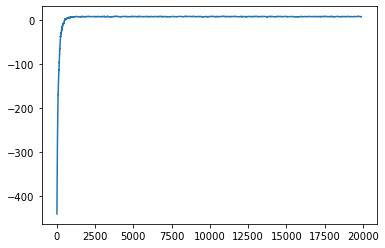

In [10]:
# print average rewards
plt.plot(avg_rewards)
plt.show()